# Iris Dataset Model

## 1. Prepare Problem

### a) Load Libraries

In [21]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline

### b) Load dataset

In [5]:
filename = "iris.csv"
#names = "SepalLength,SepalWidth,PetalLength,PetalWidth,Name".split(",")
#dataset = read_csv(filename, names=names)
dataset = read_csv(filename)
#dataset.drop(dataset.index[0], inplace=True)

## 2. Summarize Data

### a) Descriptive Statistics

In [6]:
dataset.shape

(150, 5)

In [7]:
dataset.head(20)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
dataset.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset.groupby("Name").size()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### b) Data Visualization

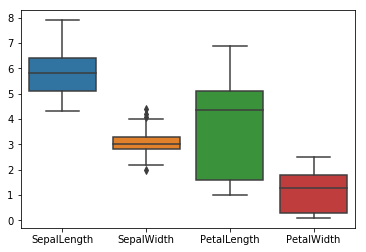

In [10]:
sns.boxplot(data=dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9FC8BC828>,
      dtype=object)

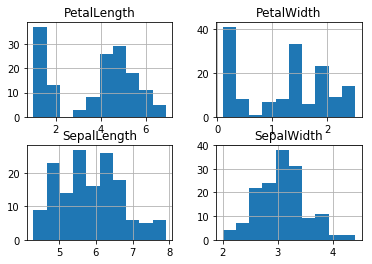

In [11]:
dataset.hist()

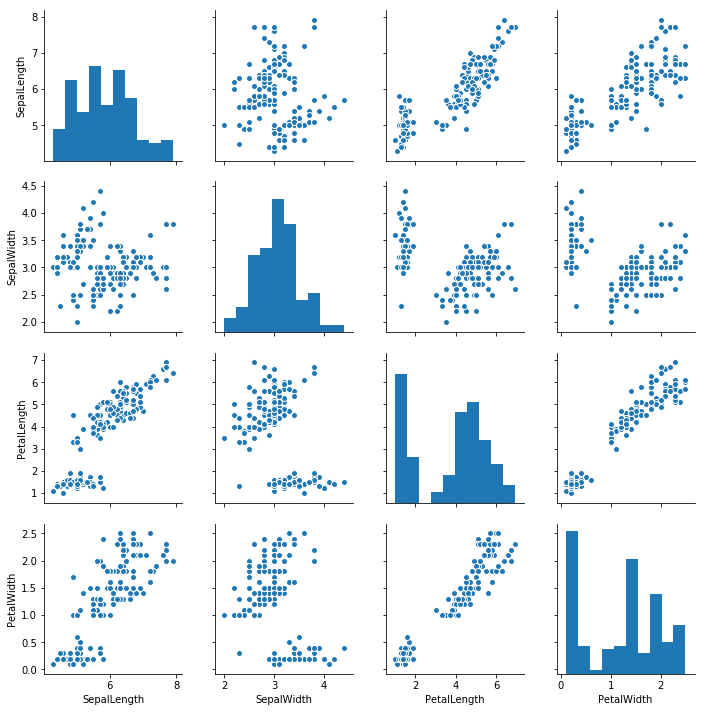

In [12]:
sns.pairplot(data=dataset)

## 3. Evaluate Algorithms

### a) Split-out validation dataset

In [13]:
array = dataset.values
X = array[:,:4]
y = array[:,4]
validation_size = 0.2
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, 
                                                                y,
                                                                test_size=validation_size, 
                                                                random_state=seed)

### b) Spot Check Algorithms

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

### c) Evaluate each model in turn

In [15]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


### d) Compare Algorithms

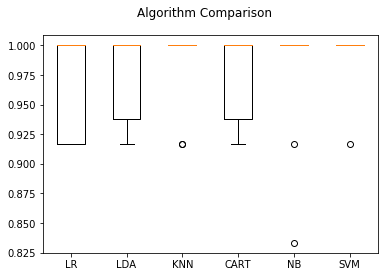

In [16]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 4. Finalize Model

### a) Predictions on Validation Dataset

In [17]:
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print("")
print(confusion_matrix(y_validation, predictions))
print("")
print(classification_report(y_validation, predictions))

0.9333333333333333

[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

